In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key 

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-37.057445340383374 -59.65900854289974
-44.77899965896885 122.31027027903917
-4.492743326039729 -100.44108295119561
-23.1785901606753 89.11165213305566
29.500959678496883 -85.87978521544888
-53.44147820462622 107.70644441001781
-51.93437476508423 -78.14467246034259
23.401189341506324 -90.41964877371498
-82.58527934973203 -31.192749277852897
10.351064848980414 -44.51775901298842
77.23459602717469 61.35335999923305
39.60386205160887 50.291194469087856
83.04239147625475 103.41817751439419
76.42096340992742 -56.59068231293402
25.803989858829382 -67.29132923147144
84.38540450636472 149.7974602354244
-62.06018805169429 129.29732301949224
-20.98292452745102 -161.8972640250309
-19.27158788816338 -45.380881051538125
-11.87903615248311 -119.05736926145548
-41.66091806246803 -130.59806118927546
-68.75527829981822 -0.994263728890445
-38.565018698250775 93.15910417645529
59.02585396072584 20.092673072113172
-29.425938910526128 -8.381083003165656
73.30263006929957 122.71288849485558
-81.395544151754

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [11]:
 # Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | azul
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | panama city
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | progreso
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | cayenne
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | turkan
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | abaete
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | maarianhamina
Process

In [14]:
len(city_data)

574

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Azul,-36.7770,-59.8585,97.57,16,67,18.14,AR,2022-12-07 20:52:56
1,Albany,42.6001,-73.9662,57.72,91,100,1.01,US,2022-12-07 20:52:28
2,Puerto Ayora,-0.7393,-90.3518,82.36,89,8,7.00,EC,2022-12-07 20:52:56
3,Bengkulu,-3.8004,102.2655,74.82,90,99,4.88,ID,2022-12-07 20:49:28
4,Panama City,8.9936,-79.5197,87.13,55,20,16.11,PA,2022-12-07 20:50:00
5,Punta Arenas,-53.1500,-70.9167,53.62,49,0,17.27,CL,2022-12-07 20:49:28
6,Progreso,21.2833,-89.6667,87.12,73,1,16.44,MX,2022-12-07 20:50:12
7,Ushuaia,-54.8000,-68.3000,51.46,43,40,24.16,AR,2022-12-07 20:52:57
8,Cayenne,4.9333,-52.3333,82.44,74,0,10.36,GF,2022-12-07 20:52:58
9,Turkan,40.3639,50.2150,42.98,61,100,2.30,AZ,2022-12-07 20:52:58


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
clean_city_data_df = city_data_df[new_column_order] 
clean_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Azul,AR,2022-12-07 20:52:56,-36.7770,-59.8585,97.57,16,67,18.14
1,Albany,US,2022-12-07 20:52:28,42.6001,-73.9662,57.72,91,100,1.01
2,Puerto Ayora,EC,2022-12-07 20:52:56,-0.7393,-90.3518,82.36,89,8,7.00
3,Bengkulu,ID,2022-12-07 20:49:28,-3.8004,102.2655,74.82,90,99,4.88
4,Panama City,PA,2022-12-07 20:50:00,8.9936,-79.5197,87.13,55,20,16.11
5,Punta Arenas,CL,2022-12-07 20:49:28,-53.1500,-70.9167,53.62,49,0,17.27
6,Progreso,MX,2022-12-07 20:50:12,21.2833,-89.6667,87.12,73,1,16.44
7,Ushuaia,AR,2022-12-07 20:52:57,-54.8000,-68.3000,51.46,43,40,24.16
8,Cayenne,GF,2022-12-07 20:52:58,4.9333,-52.3333,82.44,74,0,10.36
9,Turkan,AZ,2022-12-07 20:52:58,40.3639,50.2150,42.98,61,100,2.30


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
clean_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1670460412.0269525

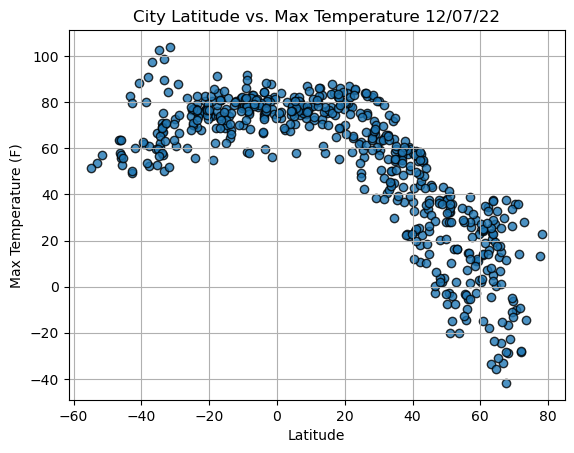

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

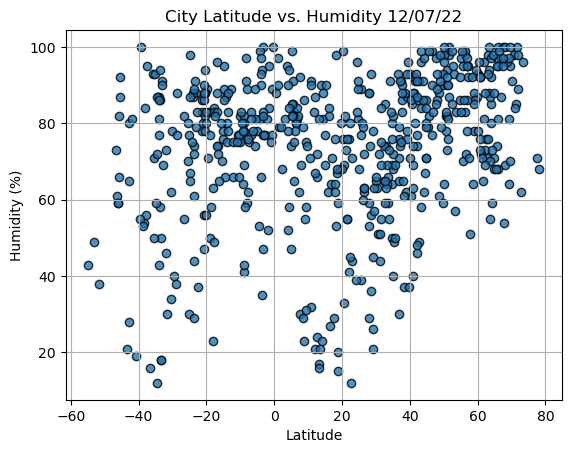

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

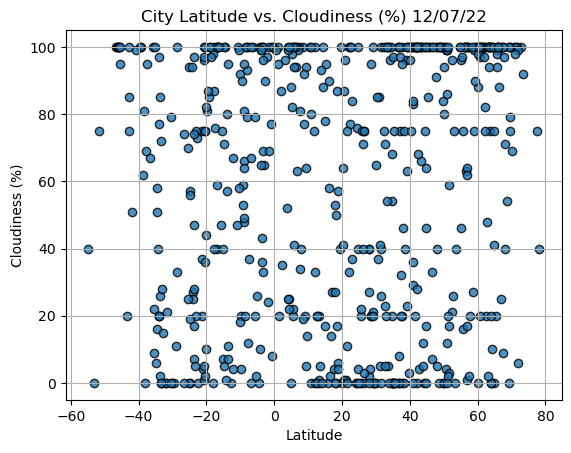

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

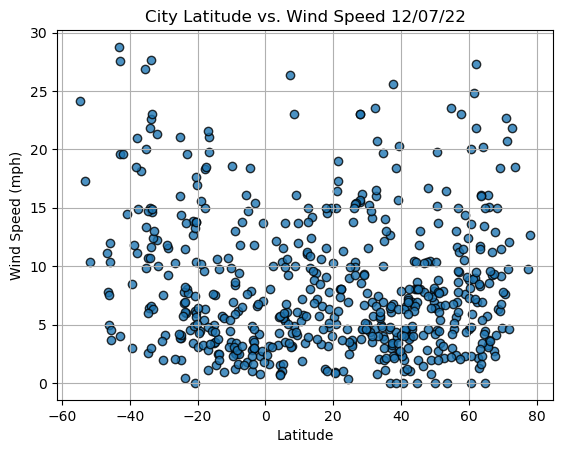

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()